In [98]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [99]:
# import the test and prediction data 
preds = pd.read_csv('predictions.csv', index_col=0)   

In [100]:
preds

,Labels,Predictions
Galaxy Index,,
97154,3,2
39402,2,2
43155,2,2
57809,1,1
53178,2,2
...,...,...
62707,2,2
94177,1,1
33968,2,2


In [101]:
# import flagged galaxies

flagged = pd.read_csv('flagged.csv', index_col=0)

In [102]:
# add column of 1s to flagged galaxies
flagged['flagged'] = 1

In [103]:
flagged

,propflaggeddiff,totalneighs,flagged
5,9,26,1
18,3,26,1
25,1,26,1
35,12,26,1
37,2,26,1
...,...,...,...
97215,7,26,1
97218,8,26,1
97222,14,26,1
97223,12,26,1


In [104]:
# merge the two dataframes on the galaxy ID and for galaxies unflagged, put a None in the propflaggeddiff and totalneighs columns

merged = pd.merge(preds, flagged, how='left', left_index=True, right_index=True)

In [105]:
merged

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
97154,3,2,5.0,26.0,1.0
39402,2,2,NaN,NaN,NaN
43155,2,2,NaN,NaN,NaN
57809,1,1,NaN,NaN,NaN
53178,2,2,NaN,NaN,NaN
...,...,...,...,...,...
62707,2,2,NaN,NaN,NaN
94177,1,1,NaN,NaN,NaN
33968,2,2,7.0,26.0,1.0


In [113]:
# remove flagged galaxies from the dataframe

pure = merged[merged['flagged'] != 1]
pure.drop(['flagged', 'propflaggeddiff', 'totalneighs'], axis=1, inplace=True)

/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_49738/194561993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pure.drop(['flagged', 'propflaggeddiff', 'totalneighs'], axis=1, inplace=True)


In [114]:
pure

,Labels,Predictions
Galaxy Index,,
39402,2,2
43155,2,2
57809,1,1
53178,2,2
79701,1,1
...,...,...
49530,2,2
62707,2,2
94177,1,1


In [115]:
# accuracy of pure and predictions

accuracy_pure = (pure['Labels'] == pure['Predictions']).sum() / len(pure)
accuracy_full = (merged['Labels'] == merged['Predictions']).sum() / len(merged)
accuracy_pure*100, accuracy_full*100

(76.7832395858808, 72.26928221132411)

In [116]:
cm_pure = confusion_matrix(pure['Labels'], pure['Predictions'])
cm_full = confusion_matrix(merged['Labels'], merged['Predictions'])

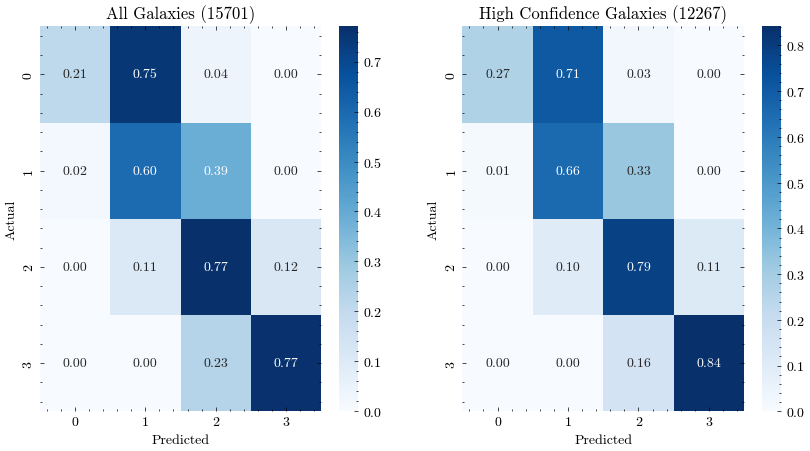

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
cm_pure = cm_pure.astype('float') / cm_pure.sum(axis=1)[:, np.newaxis]
cm_full = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_full, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
sns.heatmap(cm_pure, annot=True, fmt='.2f', cmap='Blues', ax=ax2)
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')
l1=len(merged['Labels'])
l2=len(pure['Labels'])
ax1.set_title(f'All Galaxies ({l1})')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'High Confidence Galaxies ({l2})')
fig.savefig('cm_delaunay.pdf')

In [45]:
# for each of 0, 1, 2, 3 find the TN, FP, FN, TP and create a new table for each class

# class 0
class0 = merged[merged['Labels'] == 0]
flagged0 = class0[class0['flagged'] == 1]

In [46]:
class0

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
67608,0,1,5.0,26.0,1.0
52825,0,1,NaN,NaN,NaN
59488,0,1,NaN,NaN,NaN
45858,0,1,4.0,26.0,1.0
49552,0,1,NaN,NaN,NaN
...,...,...,...,...,...
73800,0,1,NaN,NaN,NaN
89236,0,1,3.0,26.0,1.0
90158,0,1,12.0,26.0,1.0


In [47]:
flagged0

,Labels,Predictions,propflaggeddiff,totalneighs,flagged
Galaxy Index,,,,,
67608,0,1,5.0,26.0,1.0
45858,0,1,4.0,26.0,1.0
65048,0,1,12.0,26.0,1.0
66085,0,1,2.0,26.0,1.0
82656,0,1,1.0,26.0,1.0
...,...,...,...,...,...
80953,0,1,8.0,26.0,1.0
87317,0,1,3.0,26.0,1.0
89236,0,1,3.0,26.0,1.0


Now a more complicated confidence measuring scheme

In [1]:
from Utilities import cat

In [2]:
testcat = cat(path=r'/Users/daksheshkololgi/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Year 1/Illustris/TNG300-1', snapno=99, masscut=1e10)

There are 97233 subhalos with stellar mass greater than 0.6774.
Mean Subhalo Separation: 2.26 Mpc
Number Density of Subhalos: 0.0036 Mpc^-3


In [3]:
testcat.subhalo_delauany_network(xyzplot=False)

Figure saved as TNG300-1_z=0_{self.filetype}_Subhalos.pdf


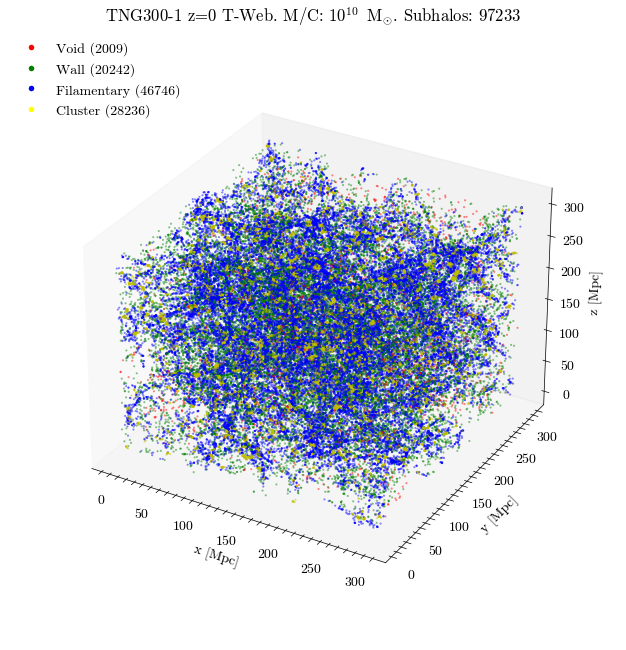

In [4]:
testcat.cweb_classify()

In [21]:
import numpy as np
import pandas as pd
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt

In [15]:
# Variable to convert smoothing scale from Mpc/h to Mpc

smoothing_scale = 205/512/testcat.hub #0.5862234626647145 #2.0/testcat.hub
print(f'Smoothing scale: {smoothing_scale} Mpc')

Smoothing scale: 0.5910697150870977 Mpc


In [16]:
smoothing_scale

0.5910697150870977

In [17]:
stars = (testcat.object['subhalos']['SubhaloMassType'][:,4]) #stellar mass of subhalos
mc = testcat.masscut*testcat.hub/1e10 #mass cut for subhalos
stars_indices = np.where(stars>=mc)[0] #indices of subhalos with stellar mass greater than masscut
print(f'Number of galaxies: {len(stars_indices)}')
print(f'Masscut in 1e10 Msun: {mc}')

Number of galaxies: 97233
Masscut in 1e10 Msun: 0.6774


In [18]:
x = (testcat.x[stars_indices])
y = (testcat.y[stars_indices])
z = (testcat.z[stars_indices])

N = 1000 # number of realisations
# Make sure sigma is equal to the smoothing scale of the CW classification algorithm {TWEB, NEXUS+}
noise_x = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc # mean 0, std smoothing_scale*1e3 kpc, and N realisations for each galaxy
noise_y = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc
noise_z = np.random.normal(0, smoothing_scale*1e3, (len(x), N))*u.kpc

noisy_x = x[:, np.newaxis] + noise_x
noisy_y = y[:, np.newaxis] + noise_y
noisy_z = z[:, np.newaxis] + noise_z

noisy_xpix = (noisy_x/testcat.dx).astype(int)
noisy_ypix = (noisy_y/testcat.dx).astype(int)
noisy_zpix = (noisy_z/testcat.dx).astype(int)

noisy_xpix = np.clip(noisy_xpix, 0, testcat.cwebdata.shape[0] - 1)
noisy_ypix = np.clip(noisy_ypix, 0, testcat.cwebdata.shape[1] - 1)
noisy_zpix = np.clip(noisy_zpix, 0, testcat.cwebdata.shape[2] - 1)

In [19]:
# trying alternative noise generation by moving grid instead
noise_gridx = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc # mean 0, std smoothing_scale*1e3 kpc, and N realisations for the whole grid. we add this noise to the coordinates of all galaxies so the distances between galaxies remain the same
noise_gridy = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc
noise_gridz = np.random.normal(0, smoothing_scale*1e3, N)*u.kpc

noisy_x2 = x[:, np.newaxis] + noise_gridx
noisy_y2 = y[:, np.newaxis] + noise_gridy
noisy_z2 = z[:, np.newaxis] + noise_gridz

noisy_xpix2 = (noisy_x2/testcat.dx).astype(int)
noisy_ypix2 = (noisy_y2/testcat.dx).astype(int)
noisy_zpix2 = (noisy_z2/testcat.dx).astype(int)

noisy_xpix2 = np.clip(noisy_xpix2, 0, testcat.cwebdata.shape[0] - 1)
noisy_ypix2 = np.clip(noisy_ypix2, 0, testcat.cwebdata.shape[1] - 1)
noisy_zpix2 = np.clip(noisy_zpix2, 0, testcat.cwebdata.shape[2] - 1)

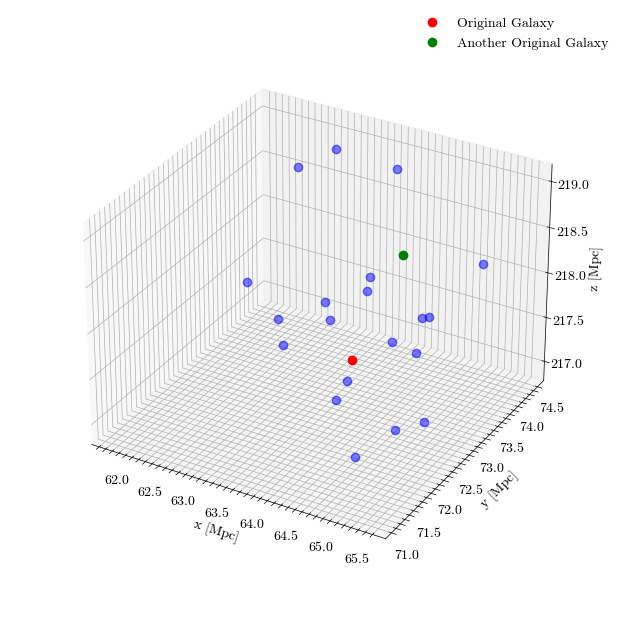

In [25]:
# plot test galaxy coordinates and realisations of the test galaxy coordinates
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
test_galaxy = 0 # galaxy index to plot
another_test_galaxy = 100
ax.plot(x[test_galaxy].to('Mpc'), y[test_galaxy].to('Mpc'), z[test_galaxy].to('Mpc'), 'o', color='red', label='Original Galaxy')
ax.plot(x[another_test_galaxy].to('Mpc'), y[another_test_galaxy].to('Mpc'), z[another_test_galaxy].to('Mpc'), 'o', color='green', label='Another Original Galaxy')

for i in range(10):
    ax.plot(noisy_x[test_galaxy, i].to('Mpc'), noisy_y[test_galaxy, i].to('Mpc'), noisy_z[test_galaxy, i].to('Mpc'), 'o', color='blue', alpha=0.5)
    ax.plot(noisy_x[another_test_galaxy, i].to('Mpc'), noisy_y[another_test_galaxy, i].to('Mpc'), noisy_z[another_test_galaxy, i].to('Mpc'), 'o', color='blue', alpha=0.5)


ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
# ax.set_xlim(0, 300)
# ax.set_ylim(0, 300)
# ax.set_zlim(0, 300)
ax.set_box_aspect(None, zoom=0.85)
ax.legend()
plt.show()

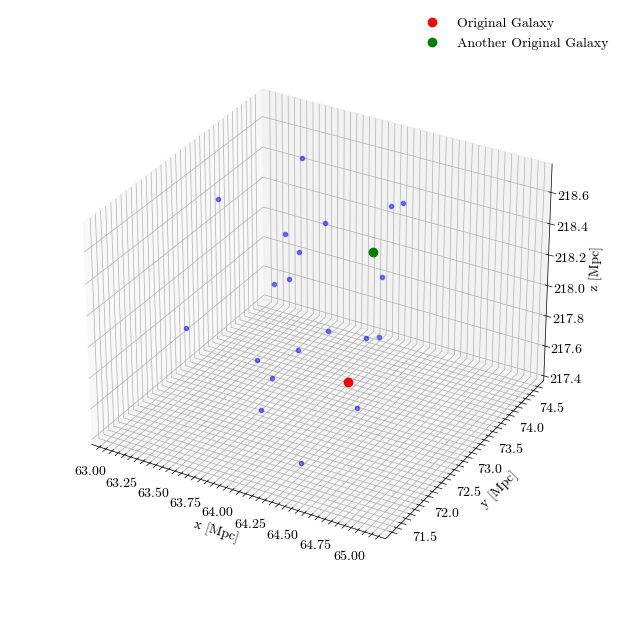

In [26]:
# plot test galaxy coordinates and realisations of the test galaxy coordinates with alternative noise generation
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
test_galaxy = 0 # galaxy index to plot
another_test_galaxy = 100
ax.plot(x[test_galaxy].to('Mpc'), y[test_galaxy].to('Mpc'), z[test_galaxy].to('Mpc'), 'o', color='red', label='Original Galaxy')
ax.plot(x[another_test_galaxy].to('Mpc'), y[another_test_galaxy].to('Mpc'), z[another_test_galaxy].to('Mpc'), 'o', color='green', label='Another Original Galaxy')
for i in range(10):
    ax.plot(noisy_x2[test_galaxy, i].to('Mpc'), noisy_y2[test_galaxy, i].to('Mpc'), noisy_z2[test_galaxy, i].to('Mpc'), '.', color='blue', alpha=0.5)
    ax.plot(noisy_x2[another_test_galaxy, i].to('Mpc'), noisy_y2[another_test_galaxy, i].to('Mpc'), noisy_z2[another_test_galaxy, i].to('Mpc'), '.', color='blue', alpha=0.5)

ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
# ax.set_xlim(0, 300)
# ax.set_ylim(0, 300)
# ax.set_zlim(0, 300)
ax.set_box_aspect(None, zoom=0.85)
ax.legend()
plt.show()

In [27]:
cweb_noisy = testcat.cwebdata[noisy_xpix, noisy_ypix, noisy_zpix] #cweb classification of N noisy realisations of each galaxy. Row = a given galaxy. column =  one realisation
cweb_noisy2 = testcat.cwebdata[noisy_xpix2, noisy_ypix2, noisy_zpix2] #cweb classification of N noisy alt realisations of each galaxy. Row = a given galaxy. column =  one realisation

In [28]:
cweb_count = {}
for index, value in enumerate(cweb_noisy):
    unique_values, counts = np.unique(value, return_counts=True)
    cweb_count[index] = dict(zip(unique_values, counts))


cweb_count2 = {}
for index, value in enumerate(cweb_noisy2):
    unique_values, counts = np.unique(value, return_counts=True)
    cweb_count2[index] = dict(zip(unique_values, counts))

In [29]:
# shifted_galaxies = {galaxy:  value for galaxy, value in cweb_count.items() if len(value) > 1} # galaxies with more than one classification
shifted_galaxies = {galaxy:  value for galaxy, value in cweb_count.items()} # galaxies with more than one classification. modifying to include all galaxies. unshifted galaxies will have only one classification
shifted_galaxies2 = {galaxy: value for galaxy, value in cweb_count2.items()} # galaxies with more than one classification. modifying to include all galaxies. unshifted galaxies will have only one classification

In [30]:
len(shifted_galaxies2)

97233

Std of gaussian noise (kpc) - 100 realisations original only not alternative

1, 97


2, 174


3, 270


5, 431


10, 888


1e3, 63618


10e3, 97233 (all galaxies become shifted with a std of 10Mpc)


smoothing_scale, 97048 (Vast majority of galaxies with an std noise of 2.9 Mpc are shifted into a new CW environment)

In [31]:
shifted_galaxies

{0: {3.0: 1000},
 1: {3.0: 1000},
 2: {3.0: 1000},
 3: {3.0: 1000},
 4: {3.0: 1000},
 5: {2.0: 221, 3.0: 779},
 6: {2.0: 1, 3.0: 999},
 7: {2.0: 37, 3.0: 963},
 8: {3.0: 1000},
 9: {2.0: 3, 3.0: 997},
 10: {3.0: 1000},
 11: {3.0: 1000},
 12: {2.0: 21, 3.0: 979},
 13: {2.0: 20, 3.0: 980},
 14: {3.0: 1000},
 15: {3.0: 1000},
 16: {2.0: 56, 3.0: 944},
 17: {3.0: 1000},
 18: {2.0: 872, 3.0: 128},
 19: {3.0: 1000},
 20: {3.0: 1000},
 21: {3.0: 1000},
 22: {2.0: 2, 3.0: 998},
 23: {2.0: 6, 3.0: 994},
 24: {3.0: 1000},
 25: {2.0: 43, 3.0: 957},
 26: {3.0: 1000},
 27: {3.0: 1000},
 28: {3.0: 1000},
 29: {3.0: 1000},
 30: {3.0: 1000},
 31: {3.0: 1000},
 32: {3.0: 1000},
 33: {3.0: 1000},
 34: {3.0: 1000},
 35: {2.0: 386, 3.0: 614},
 36: {2.0: 10, 3.0: 990},
 37: {2.0: 131, 3.0: 869},
 38: {2.0: 4, 3.0: 996},
 39: {2.0: 172, 3.0: 828},
 40: {3.0: 1000},
 41: {3.0: 1000},
 42: {3.0: 1000},
 43: {3.0: 1000},
 44: {3.0: 1000},
 45: {2.0: 3, 3.0: 997},
 46: {2.0: 1, 3.0: 999},
 47: {3.0: 1000},
 48:

In [32]:
shifted_galaxies_probs = {}
shifted_galaxies_values = {}
for galaxy in range(len(x)):
    probs = {env: 0.0 for env in range(4)}  # Assuming 4 CW environments (0, 1, 2, 3)
    vals = {env: 0 for env in range(4)}
    if galaxy in shifted_galaxies:
        env_counts = shifted_galaxies[galaxy]
        for env, count in env_counts.items():
            probs[env] = count/N
            vals[env] = count

    shifted_galaxies_probs[galaxy] = probs
    shifted_galaxies_values[galaxy] = vals


shifted_galaxies_probs2 = {}
shifted_galaxies_values2 = {}
for galaxy in range(len(x)):
    probs = {env: 0.0 for env in range(4)}  # Assuming 4 CW environments (0, 1, 2, 3)
    vals = {env: 0 for env in range(4)}
    if galaxy in shifted_galaxies2:
        env_counts = shifted_galaxies2[galaxy]
        for env, count in env_counts.items():
            probs[env] = count/N
            vals[env] = count

    shifted_galaxies_probs2[galaxy] = probs
    shifted_galaxies_values2[galaxy] = vals

In [33]:
shifted_galaxies_values

{0: {0: 0, 1: 0, 2: 0, 3: 1000},
 1: {0: 0, 1: 0, 2: 0, 3: 1000},
 2: {0: 0, 1: 0, 2: 0, 3: 1000},
 3: {0: 0, 1: 0, 2: 0, 3: 1000},
 4: {0: 0, 1: 0, 2: 0, 3: 1000},
 5: {0: 0, 1: 0, 2: 221, 3: 779},
 6: {0: 0, 1: 0, 2: 1, 3: 999},
 7: {0: 0, 1: 0, 2: 37, 3: 963},
 8: {0: 0, 1: 0, 2: 0, 3: 1000},
 9: {0: 0, 1: 0, 2: 3, 3: 997},
 10: {0: 0, 1: 0, 2: 0, 3: 1000},
 11: {0: 0, 1: 0, 2: 0, 3: 1000},
 12: {0: 0, 1: 0, 2: 21, 3: 979},
 13: {0: 0, 1: 0, 2: 20, 3: 980},
 14: {0: 0, 1: 0, 2: 0, 3: 1000},
 15: {0: 0, 1: 0, 2: 0, 3: 1000},
 16: {0: 0, 1: 0, 2: 56, 3: 944},
 17: {0: 0, 1: 0, 2: 0, 3: 1000},
 18: {0: 0, 1: 0, 2: 872, 3: 128},
 19: {0: 0, 1: 0, 2: 0, 3: 1000},
 20: {0: 0, 1: 0, 2: 0, 3: 1000},
 21: {0: 0, 1: 0, 2: 0, 3: 1000},
 22: {0: 0, 1: 0, 2: 2, 3: 998},
 23: {0: 0, 1: 0, 2: 6, 3: 994},
 24: {0: 0, 1: 0, 2: 0, 3: 1000},
 25: {0: 0, 1: 0, 2: 43, 3: 957},
 26: {0: 0, 1: 0, 2: 0, 3: 1000},
 27: {0: 0, 1: 0, 2: 0, 3: 1000},
 28: {0: 0, 1: 0, 2: 0, 3: 1000},
 29: {0: 0, 1: 0, 2: 0, 3:

In [34]:
# convert to dataframe and add galaxy ID as index and testcat.cweb as end column labelled 'original classification'
shifted_galaxies_probstab = pd.DataFrame(shifted_galaxies_probs).T
shifted_galaxies_probstab['Target'] = testcat.cweb
shifted_galaxies_probstab.index.name = 'Galaxy Index'
shifted_galaxies_probstab

shifted_galaxies_valuestab = pd.DataFrame(shifted_galaxies_values).T
shifted_galaxies_valuestab['Target'] = testcat.cweb
shifted_galaxies_valuestab.index.name = 'Galaxy Index'
shifted_galaxies_valuestab

shifted_galaxies_probstab2 = pd.DataFrame(shifted_galaxies_probs2).T
shifted_galaxies_probstab2['Target'] = testcat.cweb
shifted_galaxies_probstab2.index.name = 'Galaxy Index'
shifted_galaxies_probstab2

shifted_galaxies_valuestab2 = pd.DataFrame(shifted_galaxies_values2).T
shifted_galaxies_valuestab2['Target'] = testcat.cweb
shifted_galaxies_valuestab2.index.name = 'Galaxy Index'
shifted_galaxies_valuestab2

,0,1,2,3,Target
Galaxy Index,,,,,
0,0,0,0,1000,3.0
1,0,0,0,1000,3.0
2,0,0,0,1000,3.0
3,0,0,0,1000,3.0
4,0,0,0,1000,3.0
...,...,...,...,...,...
97228,0,0,0,1000,3.0
97229,0,0,993,7,2.0
97230,0,0,897,103,2.0


In [38]:
shifted_galaxies_probstab

,0,1,2,3,Target
Galaxy Index,,,,,
0,0.0,0.0,0.000,1.000,3.0
1,0.0,0.0,0.000,1.000,3.0
2,0.0,0.0,0.000,1.000,3.0
3,0.0,0.0,0.000,1.000,3.0
4,0.0,0.0,0.000,1.000,3.0
...,...,...,...,...,...
97228,0.0,0.0,0.000,1.000,3.0
97229,0.0,0.0,0.991,0.009,2.0
97230,0.0,0.0,0.883,0.117,2.0


/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_49738/3529419206.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0].drop('Target', axis=1), ax=ax[0, 0])#, stat='density')
/var/folders/r8/krgg76l57s322tmlvzp3l9m40000gn/T/ipykernel_49738/3529419206.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3].drop('Target', axis=1), ax=ax[1, 1])#, stat='density')


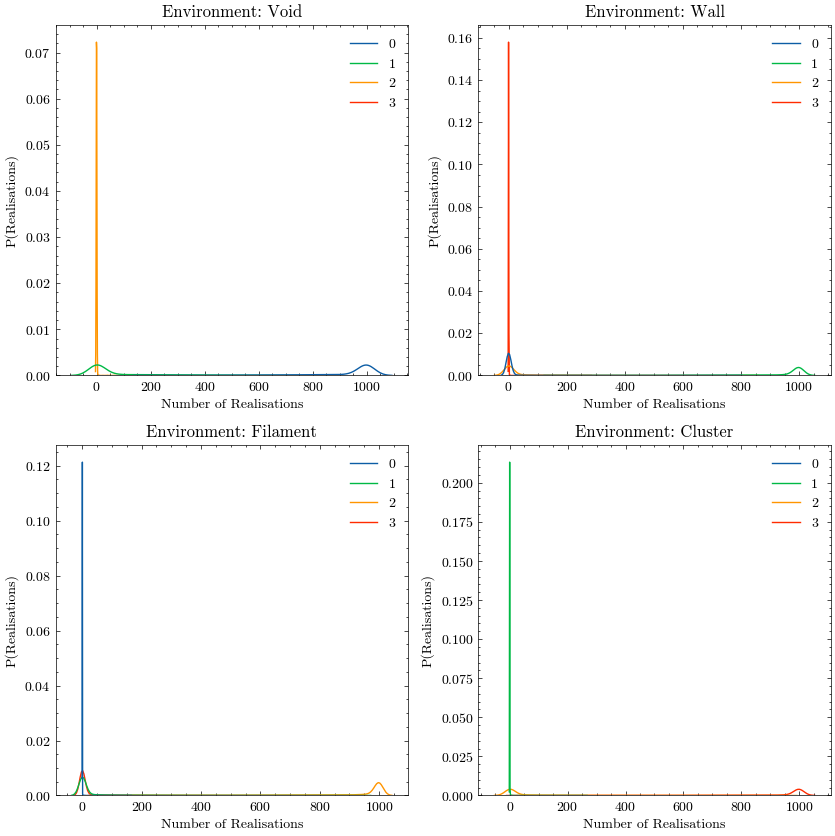

In [35]:
import seaborn as sns
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0].drop('Target', axis=1), ax=ax[0, 0])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1].drop('Target', axis=1), ax=ax[0, 1])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2].drop('Target', axis=1), ax=ax[1, 0])#, stat='density')
sns.kdeplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3].drop('Target', axis=1), ax=ax[1, 1])#, stat='density')

envs = ['Void', 'Wall', 'Filament', 'Cluster']

for i in range(4):
    ax[i//2,i%2].set_title(f'Environment: {envs[i]}')
    ax[i//2,i%2].set_xlabel('Number of Realisations')
    ax[i//2,i%2].set_ylabel('P(Realisations)')


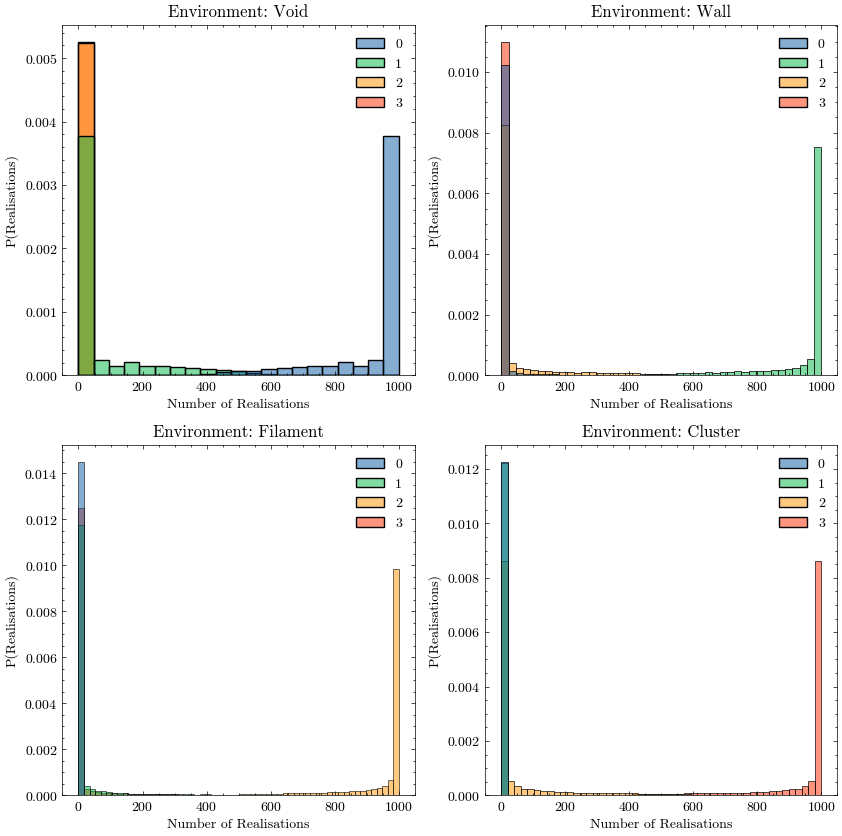

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0].drop('Target', axis=1), ax=ax[0, 0], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1].drop('Target', axis=1), ax=ax[0, 1], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2].drop('Target', axis=1), ax=ax[1, 0], stat='density')
sns.histplot(data=shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3].drop('Target', axis=1), ax=ax[1, 1], stat='density')

envs = ['Void', 'Wall', 'Filament', 'Cluster']

for i in range(4):
    ax[i//2,i%2].set_title(f'Environment: {envs[i]}')
    ax[i//2,i%2].set_xlabel('Number of Realisations')
    ax[i//2,i%2].set_ylabel('P(Realisations)')

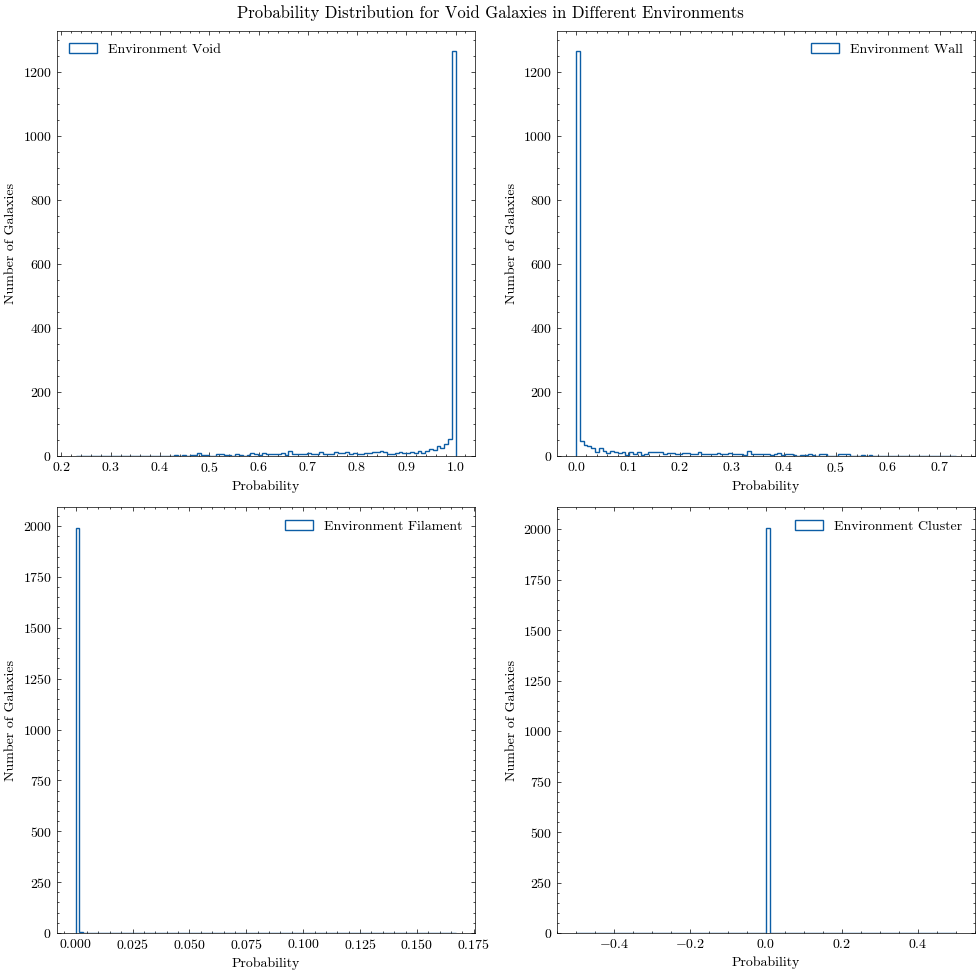

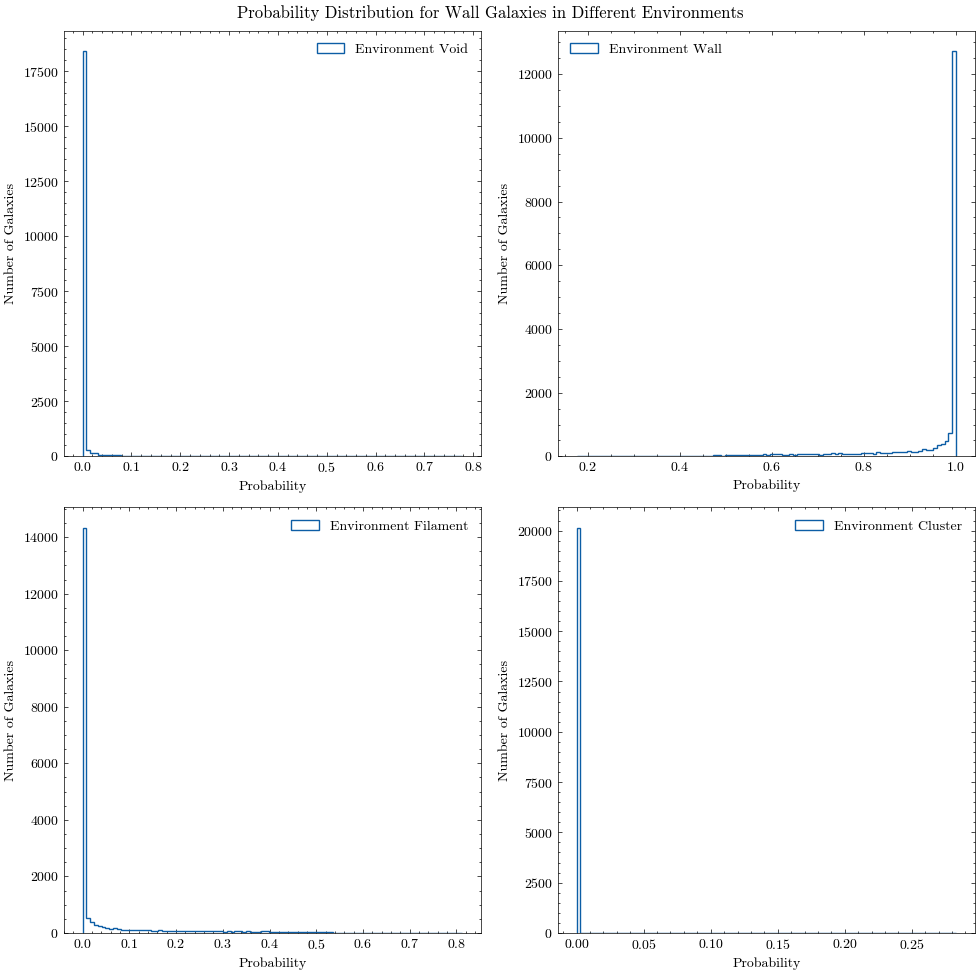

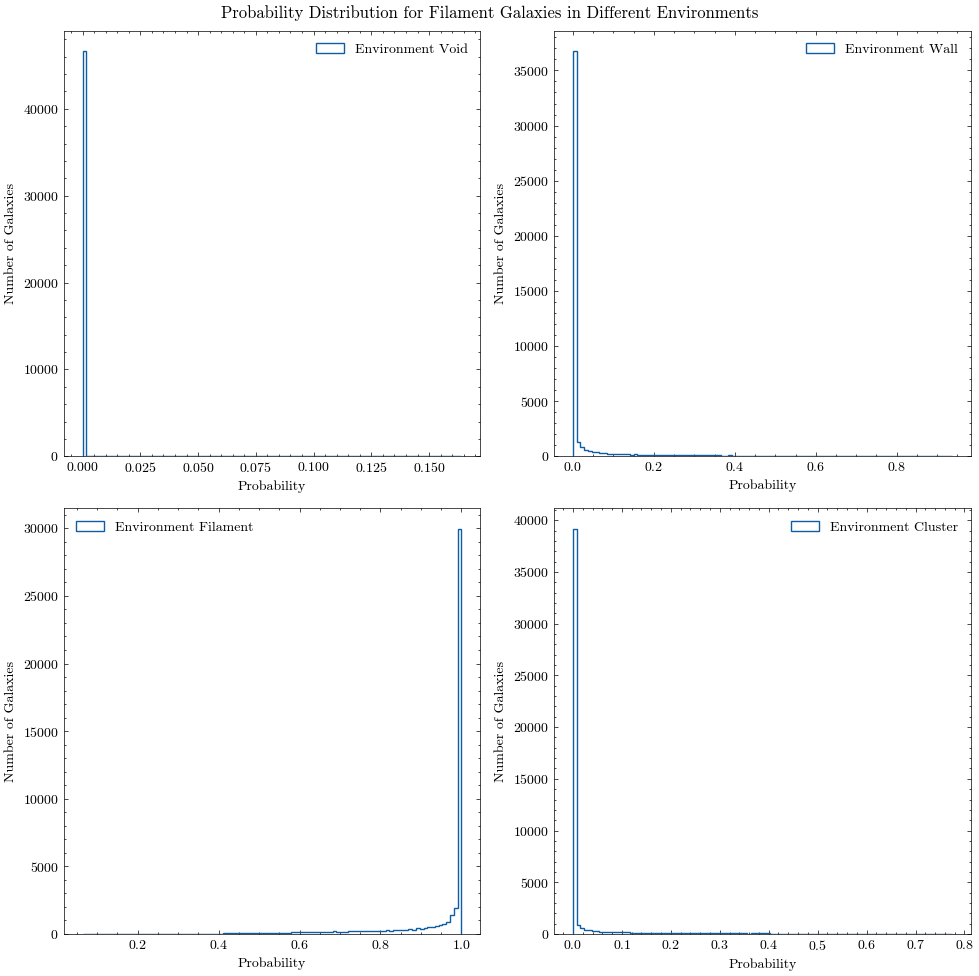

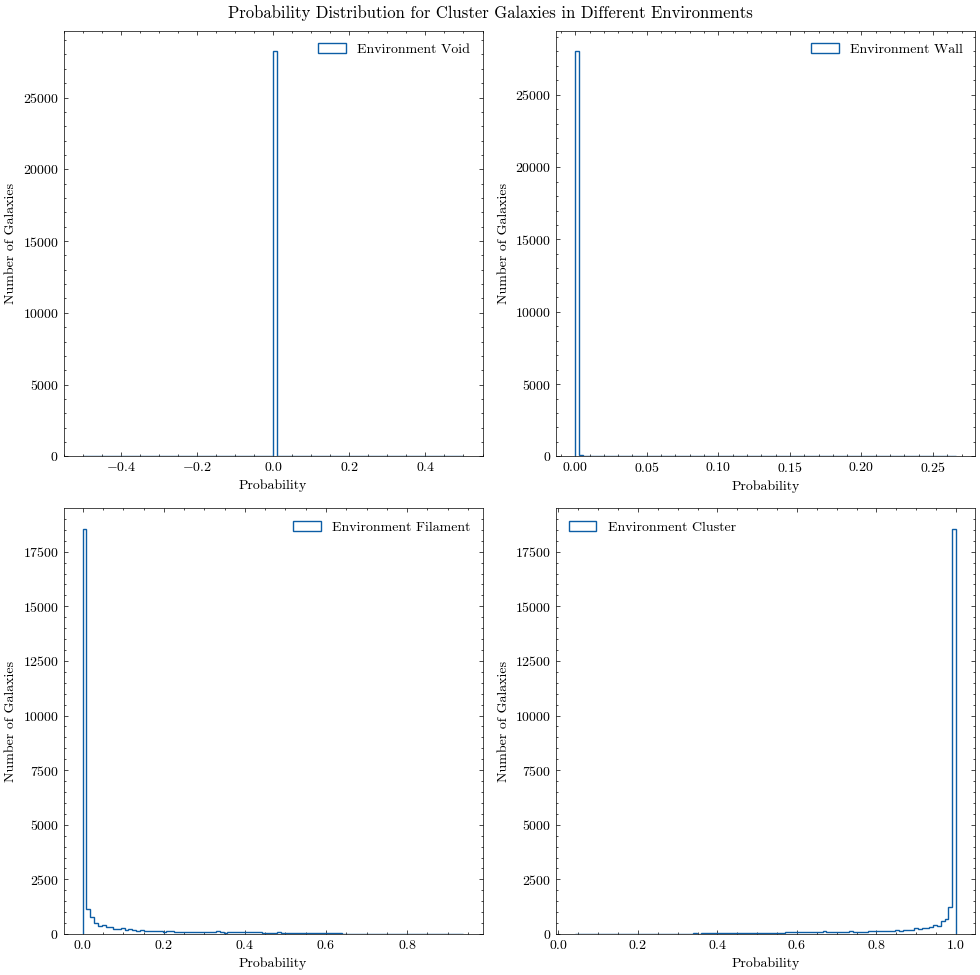

In [39]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Void Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Wall Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Filament Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Cluster Galaxies in Different Environments')
fig.tight_layout()
plt.show()


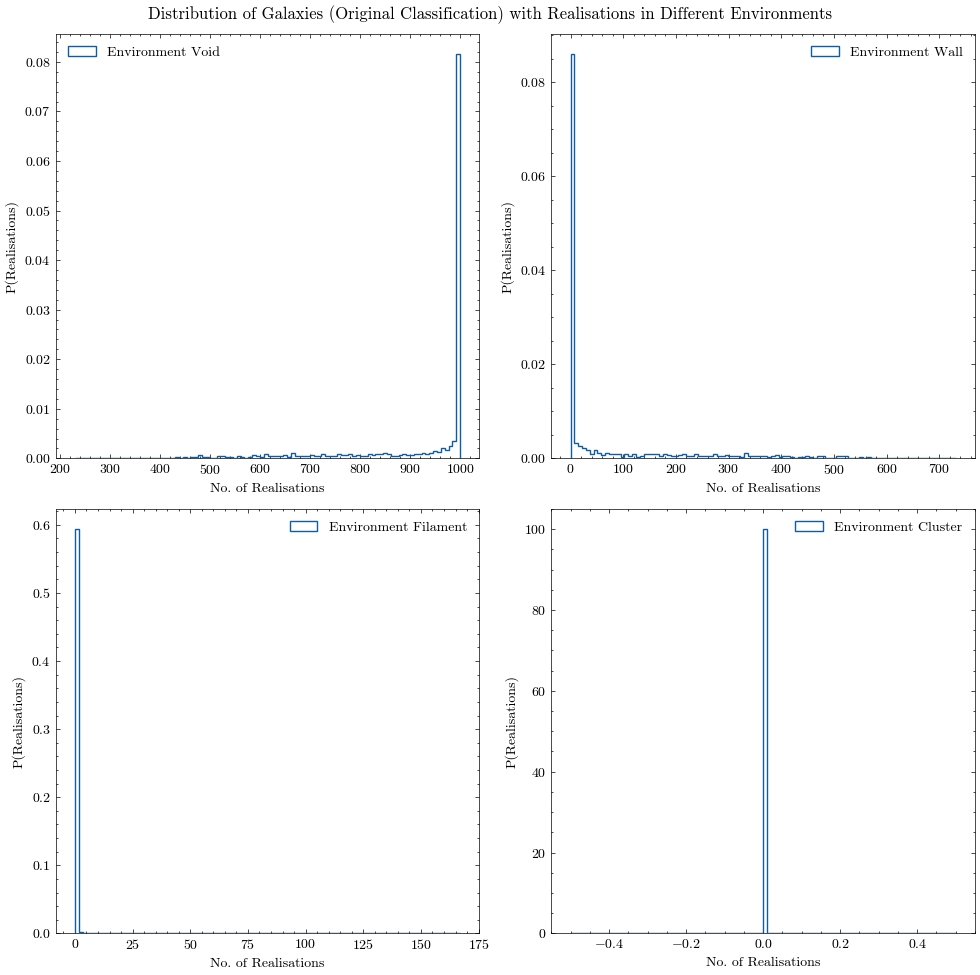

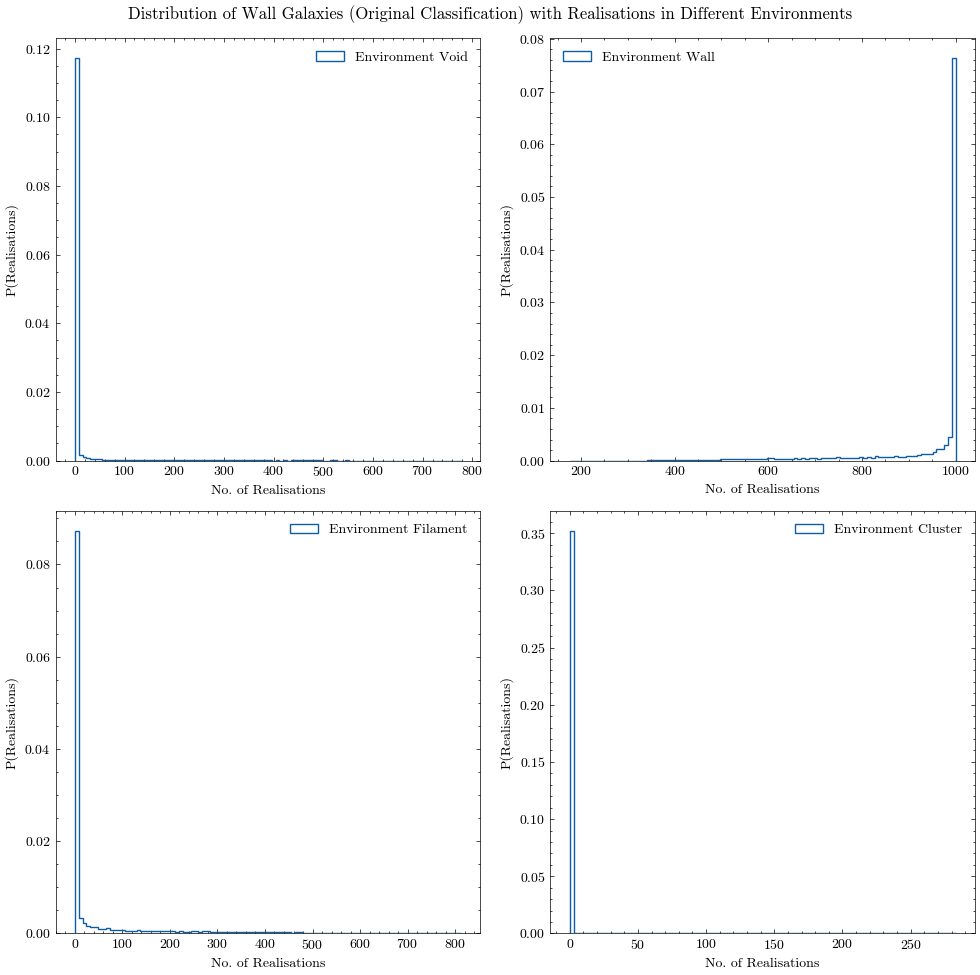

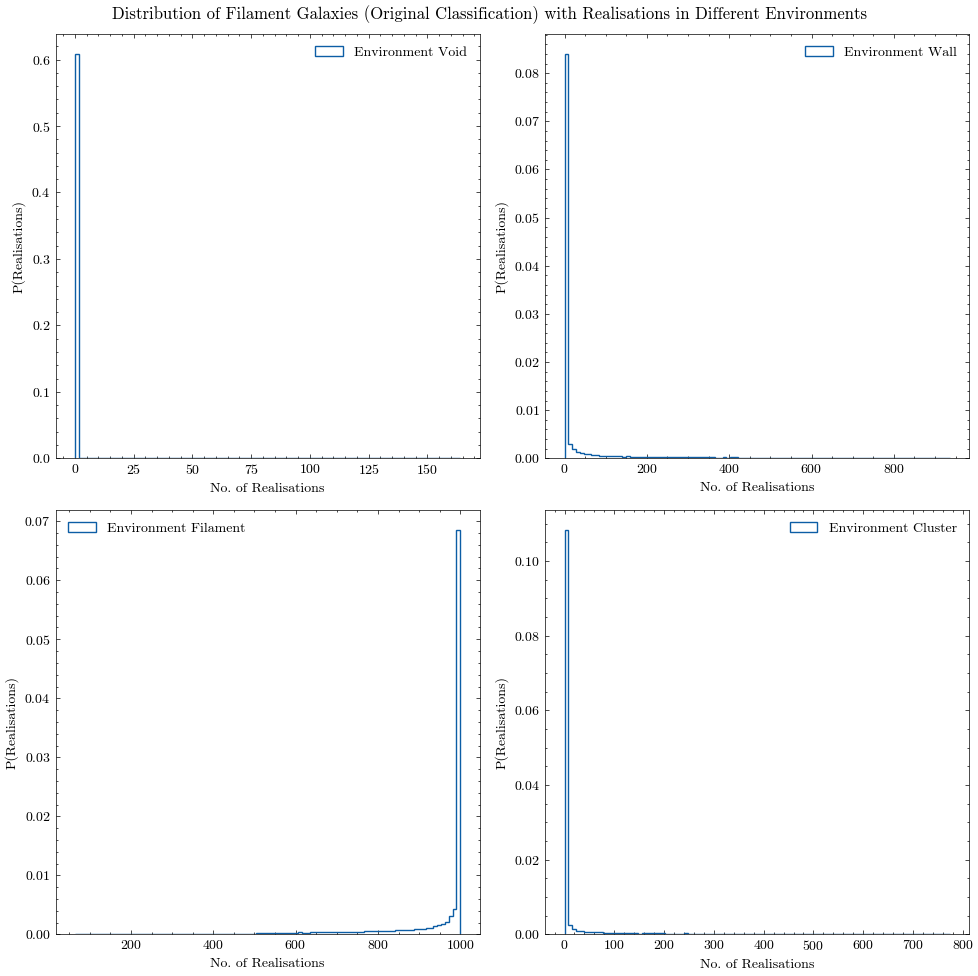

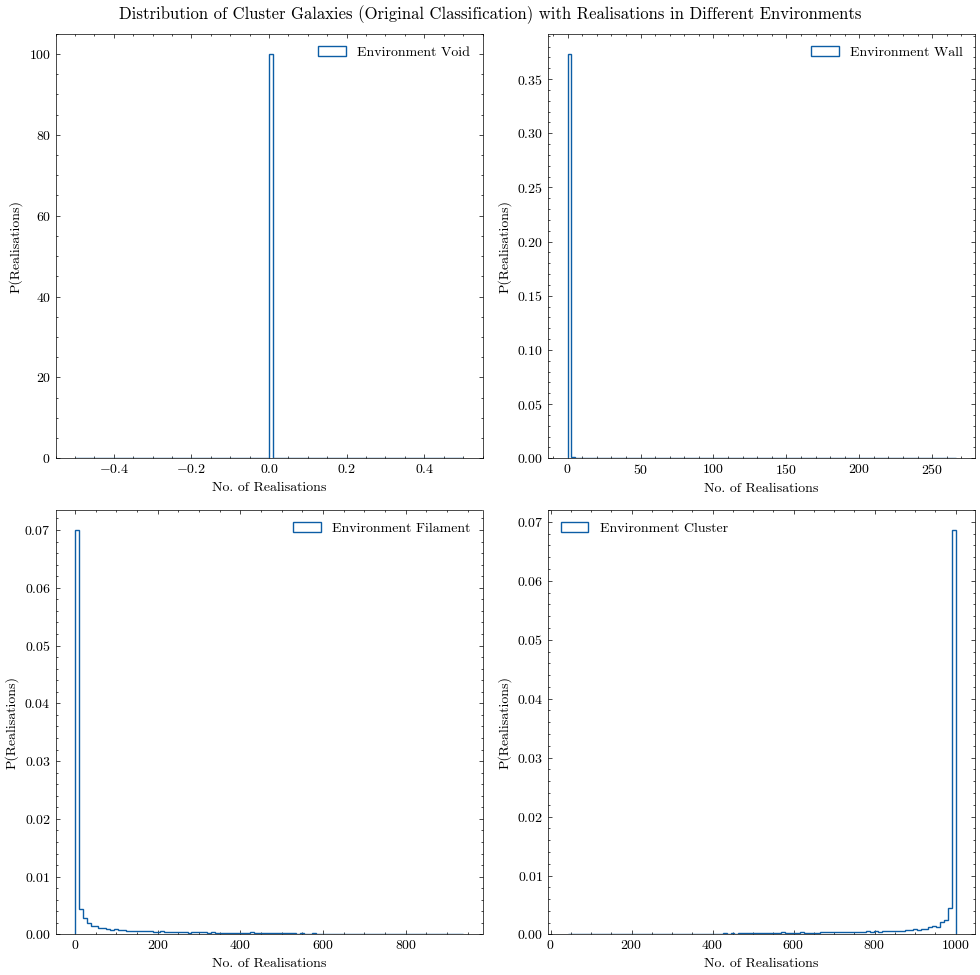

In [40]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Wall Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Filament Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_valuestab[shifted_galaxies_valuestab['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}', density=True)
    ax[i//2, i%2].set_xlabel('No. of Realisations')
    ax[i//2, i%2].set_ylabel('P(Realisations)')
    ax[i//2, i%2].legend()
fig.suptitle('Distribution of Cluster Galaxies (Original Classification) with Realisations in Different Environments')
fig.tight_layout()
plt.show()


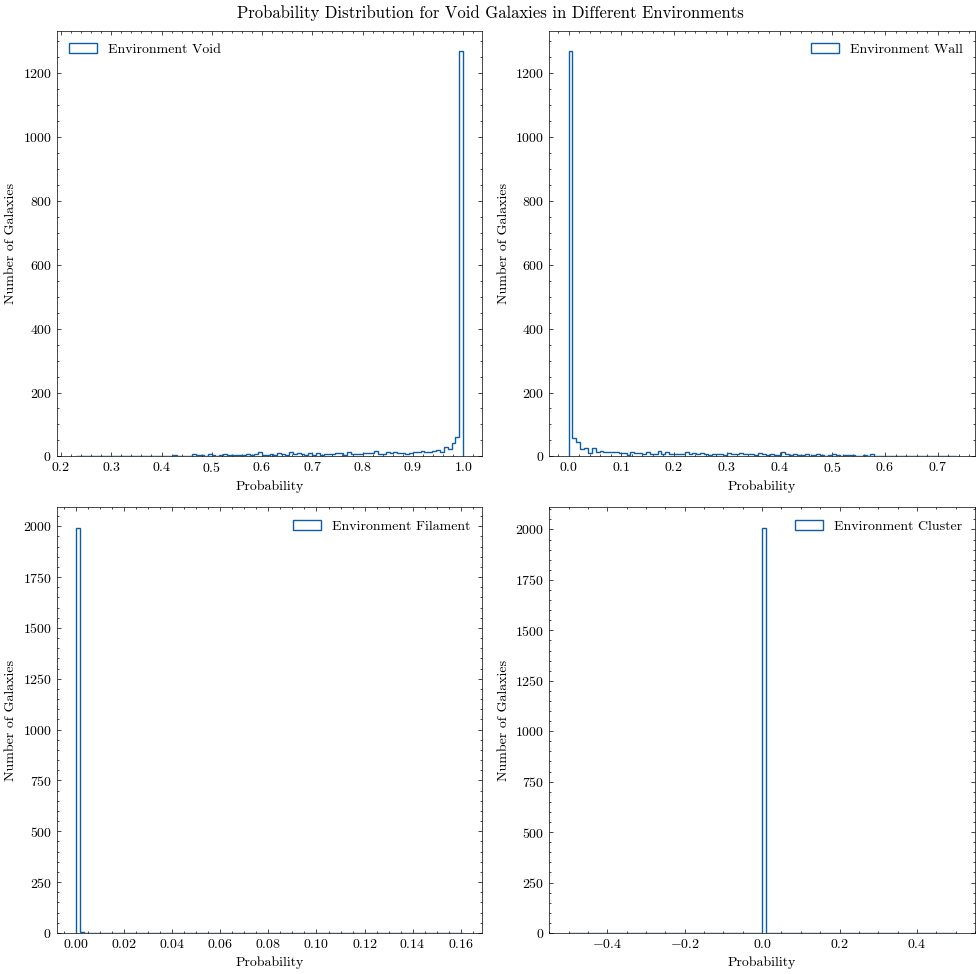

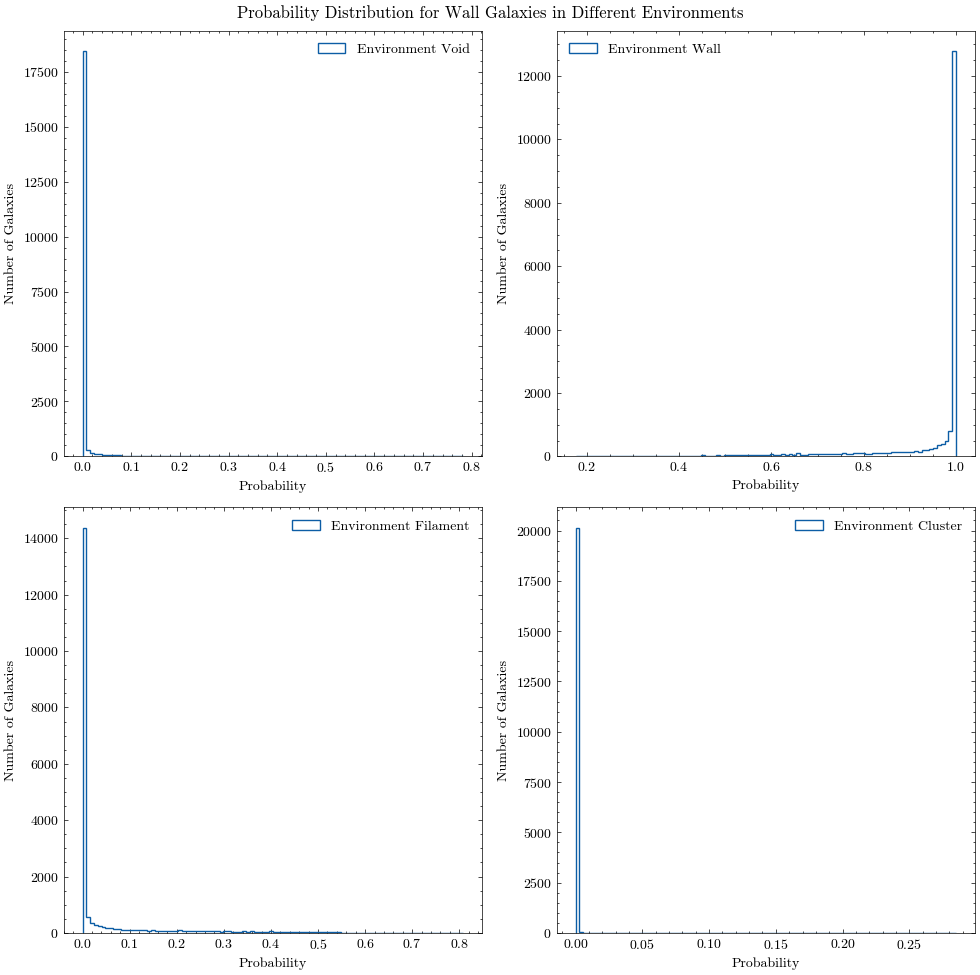

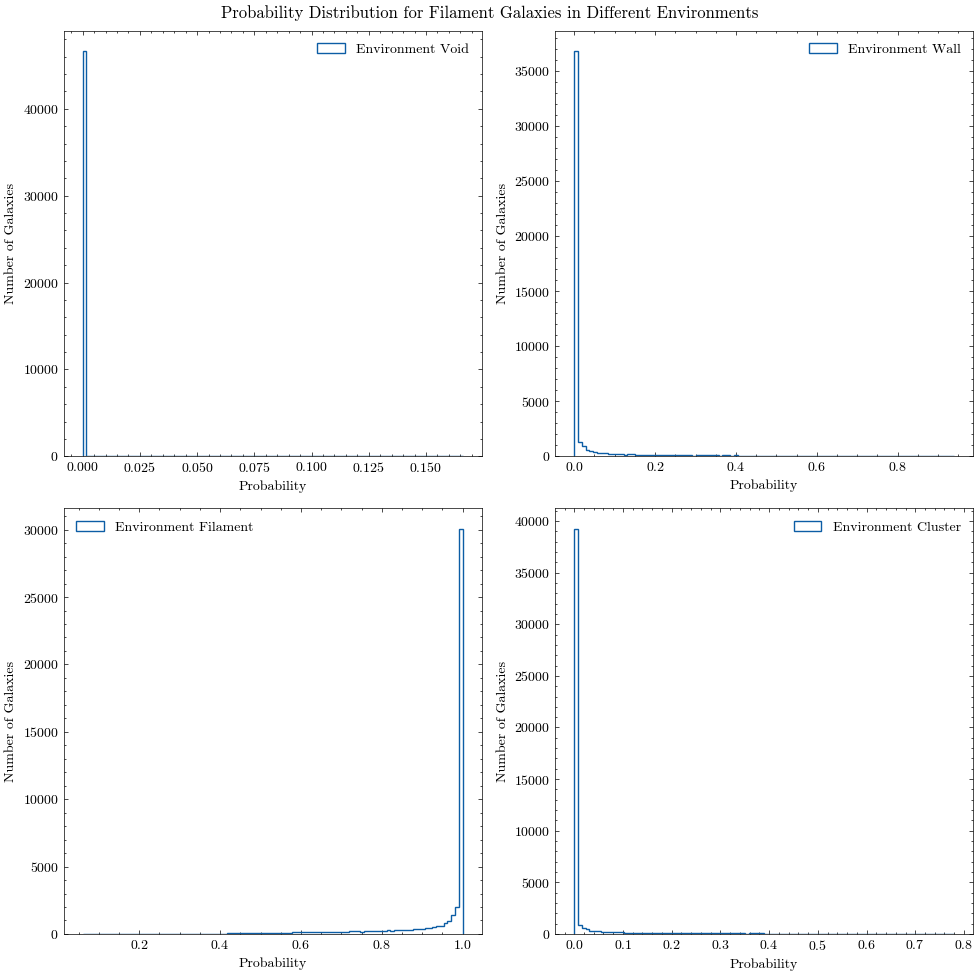

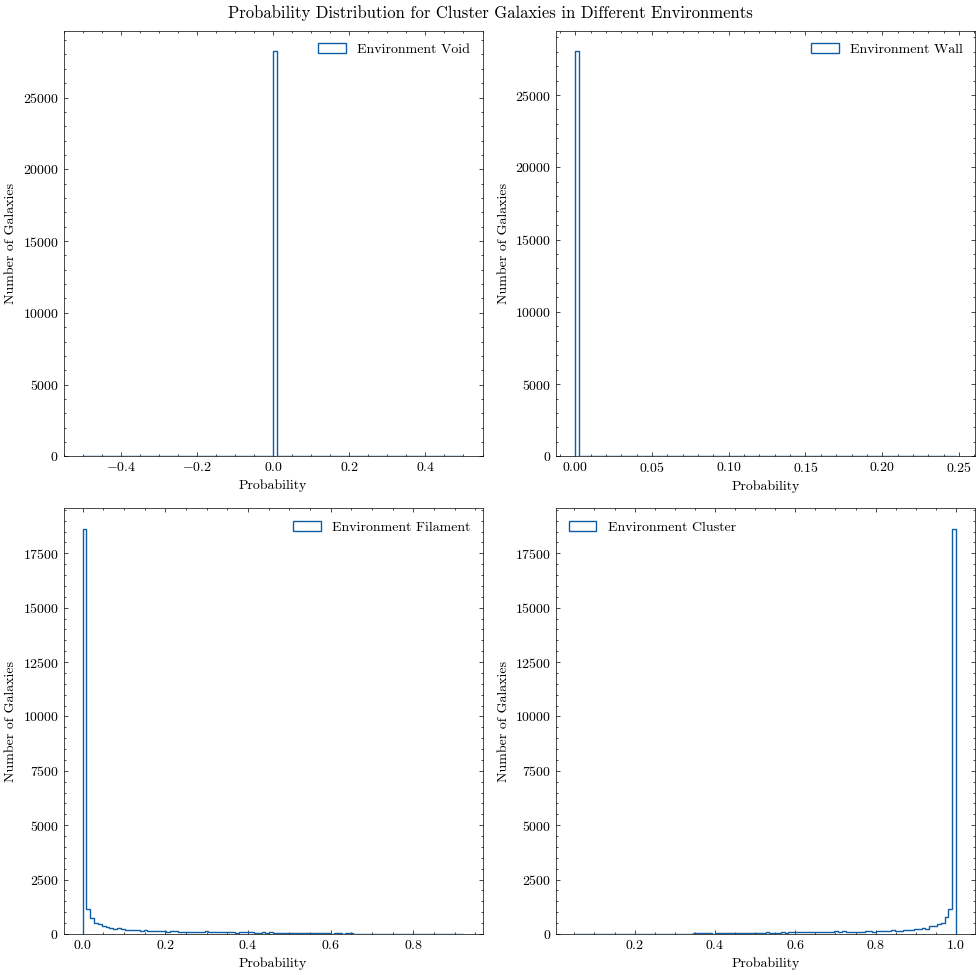

In [41]:
# plot some histograms of the probabilities

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 0.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Void Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 1.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Wall Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 2.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Filament Galaxies in Different Environments')
fig.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(4):
    envs = ['Void', 'Wall', 'Filament', 'Cluster']
    ax[i//2, i%2].hist(shifted_galaxies_probstab2[shifted_galaxies_probstab2['Target'] == 3.0][i], bins=100, histtype='step', label=f'Environment {envs[i]}')
    ax[i//2, i%2].set_xlabel('Probability')
    ax[i//2, i%2].set_ylabel('Number of Galaxies')
    ax[i//2, i%2].legend()
fig.suptitle('Probability Distribution for Cluster Galaxies in Different Environments')
fig.tight_layout()
plt.show()


In [69]:

voids = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 0.0]
walls = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 1.0]
filaments = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 2.0]
clusters = shifted_galaxies_probstab[shifted_galaxies_probstab['Target'] == 3.0]
print('Target=0:',len(voids))
print('Target=1:',len(walls))
print('Target=2:',len(filaments))
print('Target=3:',len(clusters))
print(len(shifted_galaxies_probstab))

Target=0: 2009
Target=1: 20242
Target=2: 46746
Target=3: 28236
97233


In [82]:
print('No. of not near boundary 0:',len(voids[voids[0] >= 0.95])/len(voids))
print('No. of not near boundary 1:',len(walls[walls[1] >= 0.95])/len(walls))
print('No. of not near boundary 2:',len(filaments[filaments[2] >= 0.95])/len(filaments))
print('No. of not near boundary 3:',len(clusters[clusters[3] >= 0.95])/len(clusters))

No. of not near boundary 0: 0.7217521154803385
No. of not near boundary 1: 0.7401936567532853
No. of not near boundary 2: 0.7524066230265691
No. of not near boundary 3: 0.761793455163621


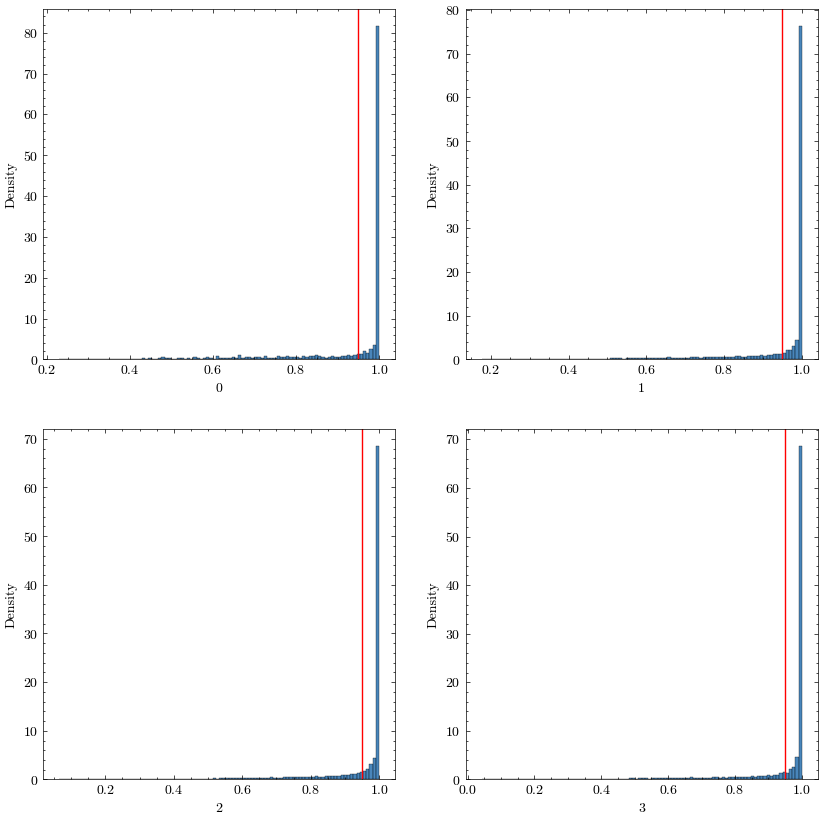

In [86]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.histplot(data=voids[0], bins=100, ax=ax[0, 0], stat='density')
sns.histplot(data=walls[1], bins=100, ax=ax[0, 1], stat='density')
sns.histplot(data=filaments[2], bins=100, ax=ax[1, 0], stat='density')
sns.histplot(data=clusters[3], bins=100, ax=ax[1, 1], stat='density')
ax[0,0].axvline(0.95, color='red')
ax[0,1].axvline(0.95, color='red')
ax[1,0].axvline(0.95, color='red')
ax[1,1].axvline(0.95, color='red')

In [94]:
hcon_voids = np.array(voids[voids[0] >= 0.95].index)
hcon_walls = np.array(walls[walls[1] >= 0.95].index)
hcon_filaments = np.array(filaments[filaments[2] >= 0.95].index)
hcon_clusters = np.array(clusters[clusters[3] >= 0.95].index)

In [106]:
preds

,Labels,Predictions
Galaxy Index,,
97154,3,2
39402,2,2
43155,2,2
57809,1,1
53178,2,2
...,...,...
62707,2,2
94177,1,1
33968,2,2


In [109]:
# filter preds to only include high confidence galaxies, ignore if not in high confidence list
hcon_preds = preds[preds.index.isin(hcon_voids) | preds.index.isin(hcon_walls) | preds.index.isin(hcon_filaments) | preds.index.isin(hcon_clusters)]
hcon_preds

,Labels,Predictions
Galaxy Index,,
39402,2,2
43155,2,2
57809,1,1
53178,2,2
79701,1,1
...,...,...
22807,2,3
62707,2,2
94177,1,1


In [111]:
# accuracy of high confidence galaxies
accuracy_hcon = (hcon_preds['Labels'] == hcon_preds['Predictions']).sum() / len(hcon_preds)
accuracy_hcon*100

77.35111715232351

Text(0.5, 1.0, 'High Confidence Galaxies (11771)')

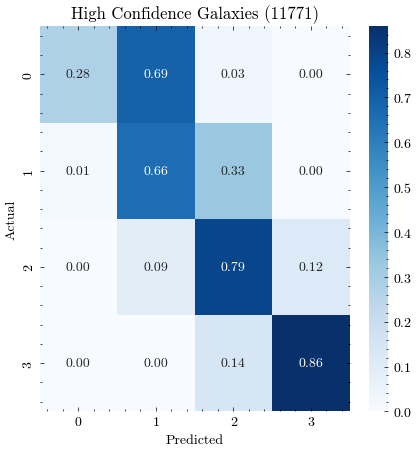

In [112]:
# confusion matrix of high confidence galaxies
cm_hcon = confusion_matrix(hcon_preds['Labels'], hcon_preds['Predictions'])
cm_hcon = cm_hcon.astype('float') / cm_hcon.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_hcon, annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'High Confidence Galaxies ({len(hcon_preds)})')
